In [3]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy.utilities import lambdify
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

sp.init_printing()
x = sp.Symbol('x', real = True)
k = sp.Symbol('k', real = True, positive = True)
a = sp.Symbol('a', real = True)
n = sp.Symbol('n', integer = True, nonzero = True)
m = sp.Symbol('m', real = True, positive = True)
h = sp.Symbol('hbar', real = True, positive = True)
t = sp.Symbol('t', real = True, positive = True)
psi = sp.Function('\psi')

x, k, a, psi(x), n, m, h, t
psi(x).diff(x, x)
 
-k**2 * psi(x)
eq = sp.Eq(psi(x).diff(x, x), -k**2 * psi(x))
eq
 
sol = sp.dsolve(eq, psi(x), ics = {psi(0): 0, psi(a): 0})
sol
sol = sp.dsolve(eq, psi(x), ics = {psi(0): 0})
sol
# sol = sp.dsolve(eq, psi(x), ics = {psi(0): 0, psi(a): 0})
# sol
sol = sol.subs(k, n * sp.pi / a)
sol
 
sol.lhs, sol.rhs
 
sol.rhs**2
 
sp.integrate(sp.Abs(sol.rhs)**2, (x, 0, a))
 
sol.rhs * sp.conjugate(sol.rhs)
 
 
sp.integrate(sol.rhs * sp.conjugate(sol.rhs), (x, 0, a))
 
 
sp.integrate(sol.rhs**2, (x, 0, a))
 
sp.Symbol('C1')
sol = sol.subs(sp.Symbol('C1'), sp.sqrt(2 / a))
sol
 
 
E = n**2 * sp.pi**2 * h**2 / (2 * m * a**2)
E
 
fi = sp.exp(-sp.I * E * t / h)
fi
 
Psi = sol.rhs * fi
Psi
 
 
 
Psi.subs({m: 1, a: 1, h: 1})
 
Psif = lambdify((x, t, n), Psi.subs({m: 1, a: 1, h: 1}))
Psif(0.3, 0.1, 1)

p = sp.integrate(-1 * sp.I * h * sol.rhs.diff(x) * sol.rhs, (x, 0, a)).simplify()
p

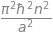

In [6]:
p2 = sp.integrate(-1 * h**2 * sol.rhs.diff(x, x) * sol.rhs, (x, 0, a)).simplify()
p2